---
# **Section I: Introduction to the problem/task and dataset**

In [1]:
# TODO: Hide warnings once final 
    # Flesh out descriptions

## **Introduction to the Task**
The primary objective of this project is to predict the likelihood of additional goals in a soccer match based on real-time in-game statistics, with the aim of supporting decision-making in sports trading (e.g., over/under betting). By analyzing game-specific metrics, we can estimate scoring potential and influence live trading models for betting and fan engagement.

## **Dataset Overview**
This project’s dataset includes 10,000 unique snapshots of soccer matches at various timestamps, capturing the state of a game through different in-game metrics. Each snapshot includes details on the current score, possession percentages, attempts, and cards, providing a rich dataset for building predictive models.


## **Problem Motivation**
The practical application of predicting match outcomes from live data is significant for team strategy and sports betting, as knowing influential factors—such as possession and dangerous attacks—can improve decision-making and potentially impact match strategies (Kuhn & Johnson, 2013).

---


# **Section 2: Description of the dataset**

### Dataset Overview
The dataset consists of 10,000 randomly selected snapshots from soccer matches, each capturing the in-game state at a specific timestamp. Each row represents a snapshot, detailing scores, possession, and other match features, which collectively provide a momentary overview of game dynamics (Anguera et al., 2018).

### Data Collection
This dataset was collected through in-game analytics systems that continuously monitor and record essential match metrics. Although highly detailed, this collection method might introduce minor noise due to the rapid state changes inherent in live sports (Yin & Leong, 2017).

| Feature                    | Description                                                                                 |
|----------------------------|---------------------------------------------------------------------------------------------|
| `uuid   `                    | The unique identifier of the snapshot                                                      |
| `current_minute `            | The current minute of the in-play match (includes 15-minute half-time break)                 |
| `home_score`               | Goals scored by the home team as of this current_minute                                     |
| `away_score`                 | Goals scored by the away team as of this current_minute                                     |
| `home_yellow_cards`          | Yellow cards given to the home team as of this current_minute                               |
| `away_yellow_cards`          | Yellow cards given to the away team as of this current_minute                               |
| `home_red_cards`             | Red cards given to the home team as of this current_minute                                  |
| `away_red_cards`             | Red cards given to the away team as of this current_minute                                  |
| `home_attacks`               | Attacks attempted by the home team as of this current_minute                                |
| `away_attacks`               | Attacks attempted by the away team as of this current_minute                                |
| `home_dangerous_attacks`     | Dangerous attacks attempted by the home team as of this current_minute                      |
| `away_dangerous_attacks`     | Dangerous attacks attempted by the away team as of this current_minute                      |
| `home_corners`               | Corners awarded to the home team as of this current_minute                                  |
| `away_corners`               | Corners awarded to the away team as of this current_minute                                  |
| `home_off_target`            | Shots that didn't require goalkeeper intervention attempted by the home team               |
| `away_off_target`            | Shots that didn't require goalkeeper intervention attempted by the away team               |
| `home_on_target`             | Shots that required goalkeeper intervention attempted by the home team                     |
| `away_on_target`             | Shots that required goalkeeper intervention attempted by the away team                     |
|` home_possession`            | Ball possession percentage for the home team until this current_minute                      |
| `away_possession`            | Ball possession percentage for the away team until this current_minute                      |
| `final_delta`                | The target value: this represents how many goals are scored after the current_minute by any team|



# **Section 3: List of requirements**

### Python Libraries

The following libraries are required to support data analysis, model training, and evaluation:
1. **Data Manipulation & Preprocessing**
- **`numpy`, `pandas`:** Core libraries for numerical operations and data handling, providing powerful data structures like arrays and DataFrames.
- **`scipy.stats`:** Statistical functions and tests for data analysis.
- **`sklearn.preprocessing`:** Scaling and transforming features (e.g., `StandardScaler`, `MinMaxScaler`, `PolynomialFeatures`).
- **`sklearn.model_selection`:** Functions for data preparation and hyperparameter tuning (`train_test_split`, `GridSearchCV`).

2. **Machine Learning Models**
- **`sklearn.linear_model`, `sklearn.neural_network`, `sklearn.ensemble`:** Regression models including Regression Models, Neural Networks, and ensemble methods like Random Forest and Extra Trees.

3. **Evaluation Metrics**
- **`sklearn.metrics`:** Common regression evaluation metrics such as MSE, RMSE, MAE, and R² score for assessing model performance.

4. **Custom Utility Functions**
- **`poly_feature_transform`, `poly_feature_transform_keep_lower_order`:** Custom functions for polynomial feature transformation for regression




In [2]:
# Data Manipulation
import numpy as np
import pandas as pd
from scipy import stats

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing, Tuning
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

# Machine Learning Models
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.pipeline import Pipeline

# Evaluation Metrics
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error ,r2_score

# Other python modules 
from utility import poly_feature_transform, poly_feature_transform_keep_lower_order


In [3]:
# import warnings
# warnings.filterwarnings('ignore') # For cleaner presentation

np.random.seed(42)

# **Section 4: Data preprocessing and cleaning**

#### Cleaning and Preprocessing Steps
- **Checking for Duplicates**: Removing redundant rows to ensure unique snapshots.
- **Type Conversion**: Ensuring all features are in suitable formats (e.g., integer for score-related features, float for percentages).
- **Handling Missing Values**: Uses techniques like imputation if necessary, based on the dataset's nature.
- **Outlier Detection**: Detects anomalies in numerical features, which may skew predictions if left unaddressed.
- **Normalizing Features**: Normalize some features to its equivalent simpler forms for better accuracy (e.g. disregarding half-time break of current_minute)

### **I. Load and Inspect the Data**
- Initial Check: Start by inspecting the data types, missing values, and unique values. This helps determine what cleaning actions are necessary (Han et al., 2011).
- Data Types: Confirm the data types for each column, ensuring numerical values are correctly identified for calculations and models.


In [4]:
df = pd.read_csv('sports.csv', index_col="uuid")
display(df.head())

df = df.reset_index(col_level=0)
df = df.drop('uuid', axis=1)
df.info()

,current_minute,home_score,away_score,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,home_dangerous_attacks,away_dangerous_attacks,home_corners,away_corners,home_off_target,away_off_target,home_on_target,away_on_target,home_possession,away_possession,final_delta
uuid,,,,,,,,,,,,,,,,,,,,
2f9dd904-8d9d-4aa0-a9d9-4e0f3e50d742,94,1,2,0,0,0,0,39,45,29,26,4,1,4,0,4,6,48,52,1
869c1420-9153-4d73-8d79-5db31a8a80a4,91,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,50,1
549e25a3-4c93-459d-b115-fb303273c78a,3,0,0,0,0,0,0,3,1,1,0,0,0,0,0,0,0,62,38,4
287b4be5-9163-4e2e-895d-d11052a97410,17,0,0,1,0,0,0,41,46,11,25,1,0,0,2,0,0,55,45,2
a607da6a-d6b2-4652-b7a5-6c8e4b61c2b8,76,1,0,1,0,0,0,69,78,21,46,1,1,0,3,4,4,45,55,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   current_minute          7000 non-null   int64
 1   home_score              7000 non-null   int64
 2   away_score              7000 non-null   int64
 3   home_yellow_cards       7000 non-null   int64
 4   away_yellow_cards       7000 non-null   int64
 5   home_red_cards          7000 non-null   int64
 6   away_red_cards          7000 non-null   int64
 7   home_attacks            7000 non-null   int64
 8   away_attacks            7000 non-null   int64
 9   home_dangerous_attacks  7000 non-null   int64
 10  away_dangerous_attacks  7000 non-null   int64
 11  home_corners            7000 non-null   int64
 12  away_corners            7000 non-null   int64
 13  home_off_target         7000 non-null   int64
 14  away_off_target         7000 non-null   int64
 15  home_on_target       

#### Check ranges of values for each feature to determine invalid / unrealistic values

In [5]:
# Statistical Summaries of All Feature 
df.agg(['min', 'max', 'median', 'mean']).T

,min,max,median,mean
current_minute,-348.0,583.0,70.0,59.491571
home_score,0.0,8.0,0.0,0.796000
away_score,0.0,9.0,0.0,0.623143
home_yellow_cards,0.0,8.0,0.0,0.522429
away_yellow_cards,0.0,8.0,0.0,0.603143
home_red_cards,0.0,2.0,0.0,0.009286
away_red_cards,0.0,2.0,0.0,0.015714
home_attacks,0.0,255.0,43.0,46.365429
away_attacks,0.0,183.0,41.0,43.325143
home_dangerous_attacks,0.0,134.0,25.0,27.611429


### II. Remove Unrealistic Values and Outliers
- Match Times (`current time`): Limit values between 0 and 105 (including a 90-minute match plus 15 minutes for half-time).
- Yellow & Red Cards: Set an upper limit of 5 yellow cards and a 5 red cards per team, as higher values are rare. 
- Attacks and Dangerous Attacks: Apply upper bounds of 150 for attacks and 100 for dangerous attacks, considering typical gameplay stats.
- Possession Percentages: Filter for rows where the sum of home_possession and away_possession is close to 100%, with a tolerance of ±2% to give way for rounding discrepancies
- `final_delta`: Filter out negative values, since goals should be a nonnegative value
- For `current_minute`, also disregard half-time break of 15 minutes since the snapshot does not change within this period

In [6]:
# Filter for realistic match time
df = df[(df['current_minute'] >= 0) & (df['current_minute'] <= 105)]

# Limit yellow, red cards to realistic maximum
df = df[(df['home_yellow_cards'] <= 5) & (df['away_yellow_cards'] <= 5)]
df = df[(df['home_red_cards'] <= 5) & (df['away_red_cards'] <= 5)]

# Limit attacks and dangerous attacks
df = df[(df['home_attacks'] <= 150) & (df['away_attacks'] <= 150)]
df = df[(df['home_dangerous_attacks'] <= 100) & (df['away_dangerous_attacks'] <= 100)]

# Check possession totals with a tolerance
df = df[np.isclose(df['home_possession'] + df['away_possession'], 100, atol=2)]

In [7]:
# Only include rows with nonnegative final_delta
df_len = len(df)
print(f'Number of rows: {df_len}')
df = df.drop(df[df['final_delta'] < 0].index)
print(f'After dropping: {len(df)} (-{df_len- len(df)})')

# Drop duplicates
dupes = df.duplicated().sum()
print(f'Number of duplicate rows: {dupes}')

df_w_dupes = len(df)
df = df.drop_duplicates()

print(f'After dropping: {len(df)} (-{df_w_dupes- len(df)})')

Number of rows: 6732
After dropping: 6729 (-3)
Number of duplicate rows: 103
After dropping: 6626 (-103)


In [8]:
# if current_minute in (45,60) then set to 45 (currently on break)
# if current_minute > 60, subtract by 15

original_minutes = df['current_minute'].copy()

df['current_minute'] = df['current_minute'].apply(
    lambda x: 45 if x in [45, 60] else (x - 15 if x > 60 else x)
)

# Count the number of rows affected
rows_affected = (df['current_minute'] != original_minutes).sum()
print(f'Number of rows affected: {rows_affected}')

Number of rows affected: 3749


In [9]:
# Drop rows w final_delta > 5, remove outliers
df = df[df['final_delta'] <= 5]
df.shape

(6532, 20)

In [ ]:
# Cap
# df['final_delta'] = df['final_delta'].apply(lambda x: 5 if x > 5 else x)

### **IV. Feature Engineering**
- Adding new features can capture dynamics between the two teams and improve predictive performance:
  * Goal Difference: A feature that shows the goal lead or deficit, useful in classification tasks related to match outcome (Kuhn & Johnson, 2013).
  * Attack Efficiency: Calculate the ratio of on-target shots to total shots, showing how effectively each team converts attacks into potential goals.
  * Possession Balance: Calculating the difference in possession provides insight into the team that controls the game.

In [11]:
# df['home_attack_efficiency'] = df['home_on_target'] / (df['home_on_target'] + df['home_off_target'] + 1e-5)
# df['away_attack_efficiency'] = df['away_on_target'] / (df['away_on_target'] + df['away_off_target'] + 1e-5)

# df = df.drop(["home_on_target", "away_on_target",
#               "home_off_target","away_off_target"], 
#               axis=1)

### VI. Final Checks
- Cap Extreme Efficiency Ratios: Limit values for home_attack_efficiency and away_attack_efficiency to a reasonable upper bound (e.g., 1 for 100% efficiency).
- Recheck for NaNs: After calculating efficiency ratios and capping values, ensure no NaNs were introduced.


In [12]:
# print(df['home_attack_efficiency'].describe())
# print()
# print(df['away_attack_efficiency'].describe())
# print()
# print("Number of NaNs:", df.isna().sum(), sep="\n")  # Confirm no missing values remain

### VIII. Final Validation:
- Ensure all features are correctly typed as either integer or float.
- Inspect the final shape of the data for Exploratory Data Analysis

In [13]:
# Statistical Summaries of All Feature 
df.agg(['min', 'max', 'median', 'mean']).T


,min,max,median,mean
current_minute,0.0,90.0,54.0,50.044397
home_score,0.0,8.0,0.0,0.785671
away_score,0.0,9.0,0.0,0.613595
home_yellow_cards,0.0,5.0,0.0,0.503215
away_yellow_cards,0.0,5.0,0.0,0.580374
home_red_cards,0.0,2.0,0.0,0.008726
away_red_cards,0.0,2.0,0.0,0.014391
home_attacks,0.0,150.0,43.0,45.572413
away_attacks,0.0,148.0,40.0,42.880741
home_dangerous_attacks,0.0,100.0,24.0,27.090631


In [14]:
print(f"Final shape: {df.shape}")
df.head()

Final shape: (6532, 20)


,current_minute,home_score,away_score,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,home_dangerous_attacks,away_dangerous_attacks,home_corners,away_corners,home_off_target,away_off_target,home_on_target,away_on_target,home_possession,away_possession,final_delta
0,79,1,2,0,0,0,0,39,45,29,26,4,1,4,0,4,6,48,52,1
1,76,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,50,1
2,3,0,0,0,0,0,0,3,1,1,0,0,0,0,0,0,0,62,38,4
3,17,0,0,1,0,0,0,41,46,11,25,1,0,0,2,0,0,55,45,2
4,61,1,0,1,0,0,0,69,78,21,46,1,1,0,3,4,4,45,55,0


---

# **Section 5: Exploratory data analysis**

### 1. What is the distribution of the target value `final_delta`? 

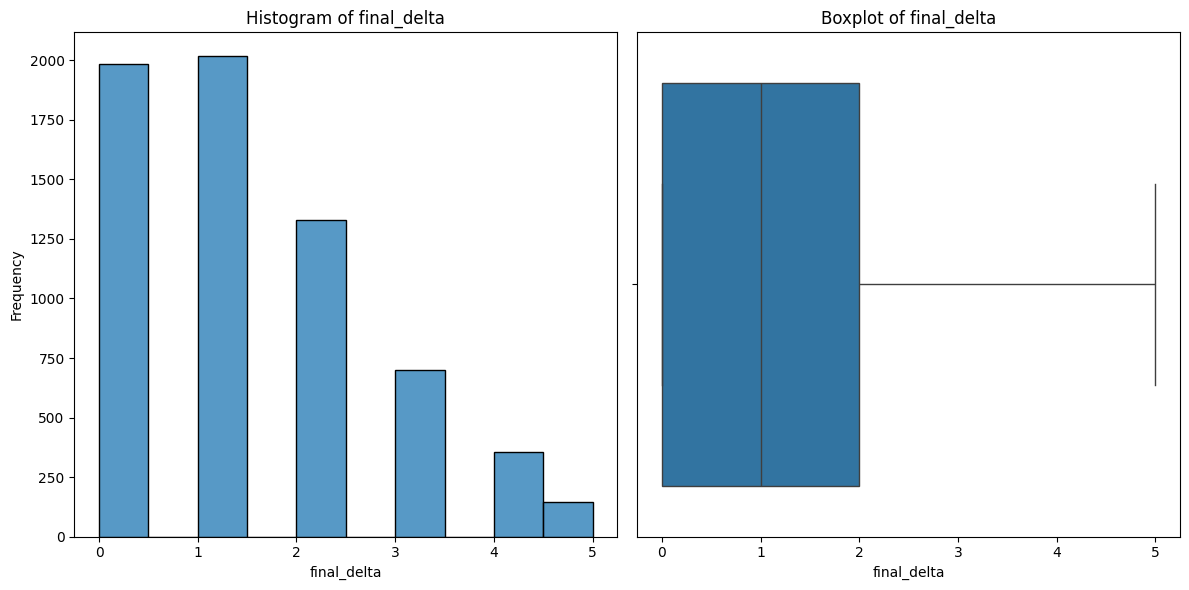

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram
sns.histplot(df['final_delta'], kde=False, bins=10, ax=axes[0])
axes[0].set_title('Histogram of final_delta')
axes[0].set_xlabel('final_delta')
axes[0].set_ylabel('Frequency')

# boxplot
sns.boxplot(x=df['final_delta'], ax=axes[1])
axes[1].set_title('Boxplot of final_delta')
axes[1].set_xlabel('final_delta')

plt.tight_layout()
plt.show()

### 2. What is the distribution of the target value `final_delta` with respect to the time elapsed given by `current_minute`? 

The histogram shows a **right-skewed distribution** where most of the values of final_delta are **concentrated in the lower range (0 to 2)**.
There are relatively fewer occurrences of higher values, with a long tail stretching towards the right. This suggests that most matches have a small change in score (i.e., either no goal or one goal), and large changes in the score (e.g., 5 or more goals) are rare. 

This is agreed by the boxplot as it indicates that the data has a central tendency around values between 0 and 2, and values greater than 5 are seen as outliers

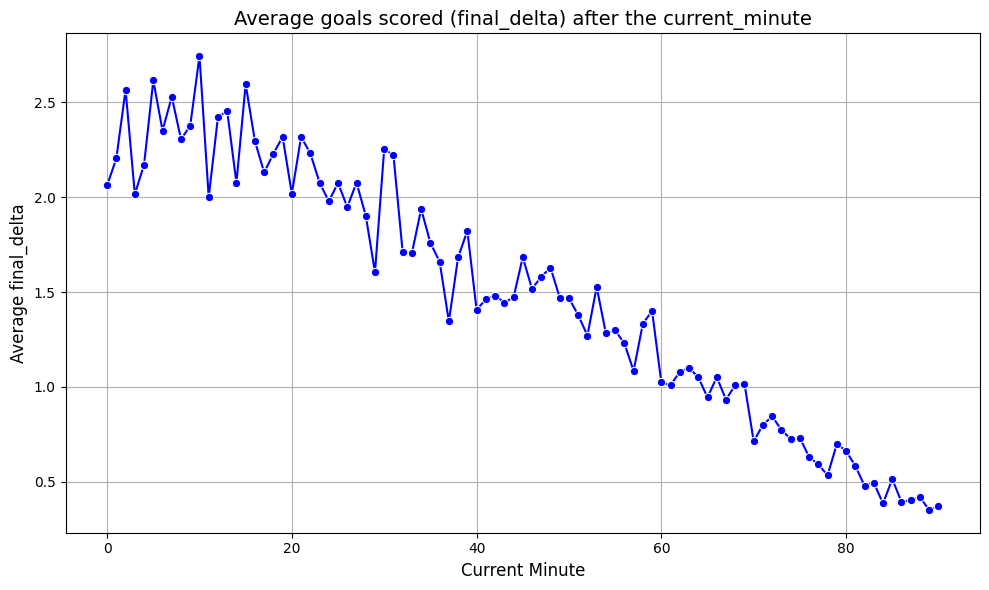

In [16]:
# Calculate the average final_delta for each current_minute
average_final_delta = df.groupby('current_minute')['final_delta'].mean().reset_index()

# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_final_delta, x='current_minute', y='final_delta', marker='o', color='b')

plt.title('Average goals scored (final_delta) after the current_minute', fontsize=14)
plt.xlabel('Current Minute', fontsize=12)
plt.ylabel('Average final_delta', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

#### *Observations:*
- This suggests that teams tend to score fewer goals as the match approaches its end.
- The plot reveals a clear downward trend, indicating that as the match progresses (from 0 to 90 minutes), the **average number of goals scored after the current minute tends to decrease**
- In the **earlier stages of the match (around the first 30-40 minutes), there seems to be some fluctuation in the average number of goals**, likely due to varied match dynamics. These fluctuations could be a result of more active attacks or unpredictable game events in the early stages.
- As the game progresses past the first 50-60 minutes, the trend stabilizes with a more gradual decline in the average final_delta. This could indicate that after the first half of the match, teams tend to become more cautious or defensive, leading to fewer goals in the second half.

  ### 3. Which features have the highest correlation with `final_delta`? 

C:\Users\Ryan\AppData\Local\Temp\ipykernel_31788\1348607881.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.index, y=correlations.values, palette='coolwarm')


,current_minute,home_score,away_score,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,home_dangerous_attacks,away_dangerous_attacks,home_corners,away_corners,home_off_target,away_off_target,home_on_target,away_on_target,home_possession,away_possession
final_delta,-0.495352,-0.176542,-0.152521,-0.178954,-0.184732,-0.040141,-0.050914,-0.334796,-0.341258,-0.322172,-0.315715,-0.263308,-0.245489,-0.249432,-0.245693,-0.230271,-0.219486,-0.000034,-0.000084


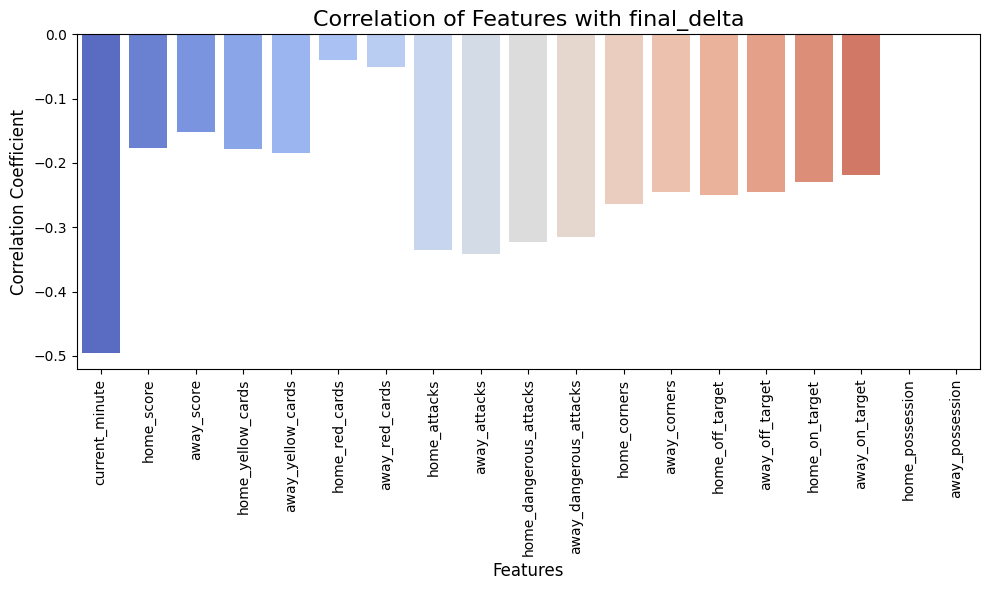

In [17]:
# Calculate correlation of each feature with `final_delta`
correlations = df.corr()['final_delta'].drop('final_delta')

# Plot the correlation graph
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values, palette='coolwarm')

# Add labels and titles

plt.xticks(rotation=90)
plt.title('Correlation of Features with final_delta', fontsize=16)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.tight_layout()

# Show plot
display(pd.DataFrame(correlations).T)
plt.show()


### 4. Pairwise Correlation of each Feature: Which pair of features are highly correlated with each other?

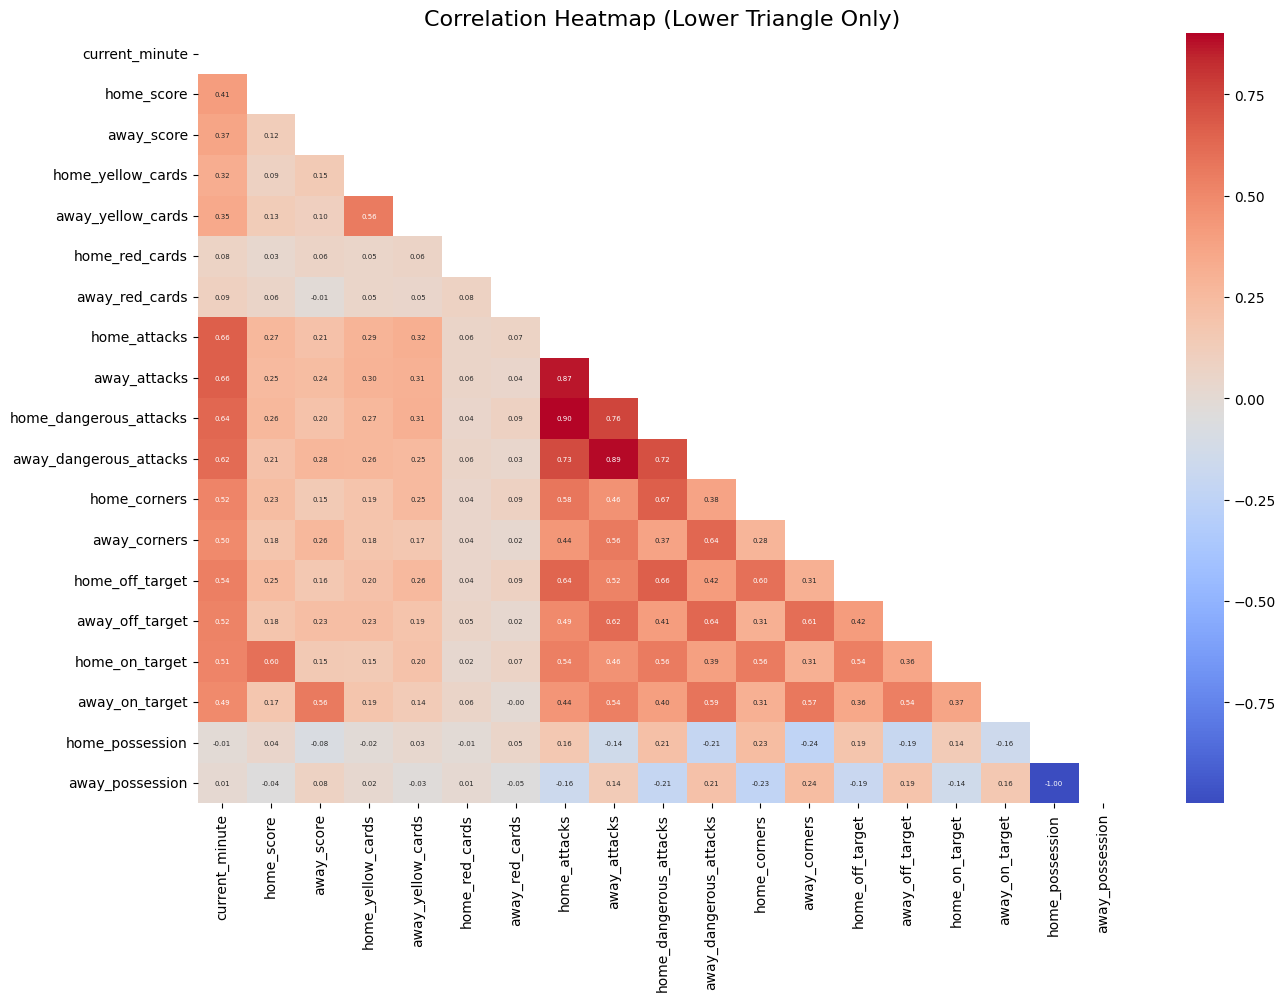

In [18]:
corr_matrix = df.drop('final_delta', axis=1).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) # Remove repeated pairs

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_matrix, mask=mask, ax=ax, annot=True, annot_kws={'size': 5}, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Lower Triangle Only)', fontsize=16)
plt.show()

The following pairs of features have high correlation with each other: 
- home_attacks and home_dangerous_attacks (and the away equivalent) - positive 
- home_attacks and away_attacks - positive

In general, the attack-related features have high positive correlations with each other (a sign we can generalize these as one feature?)

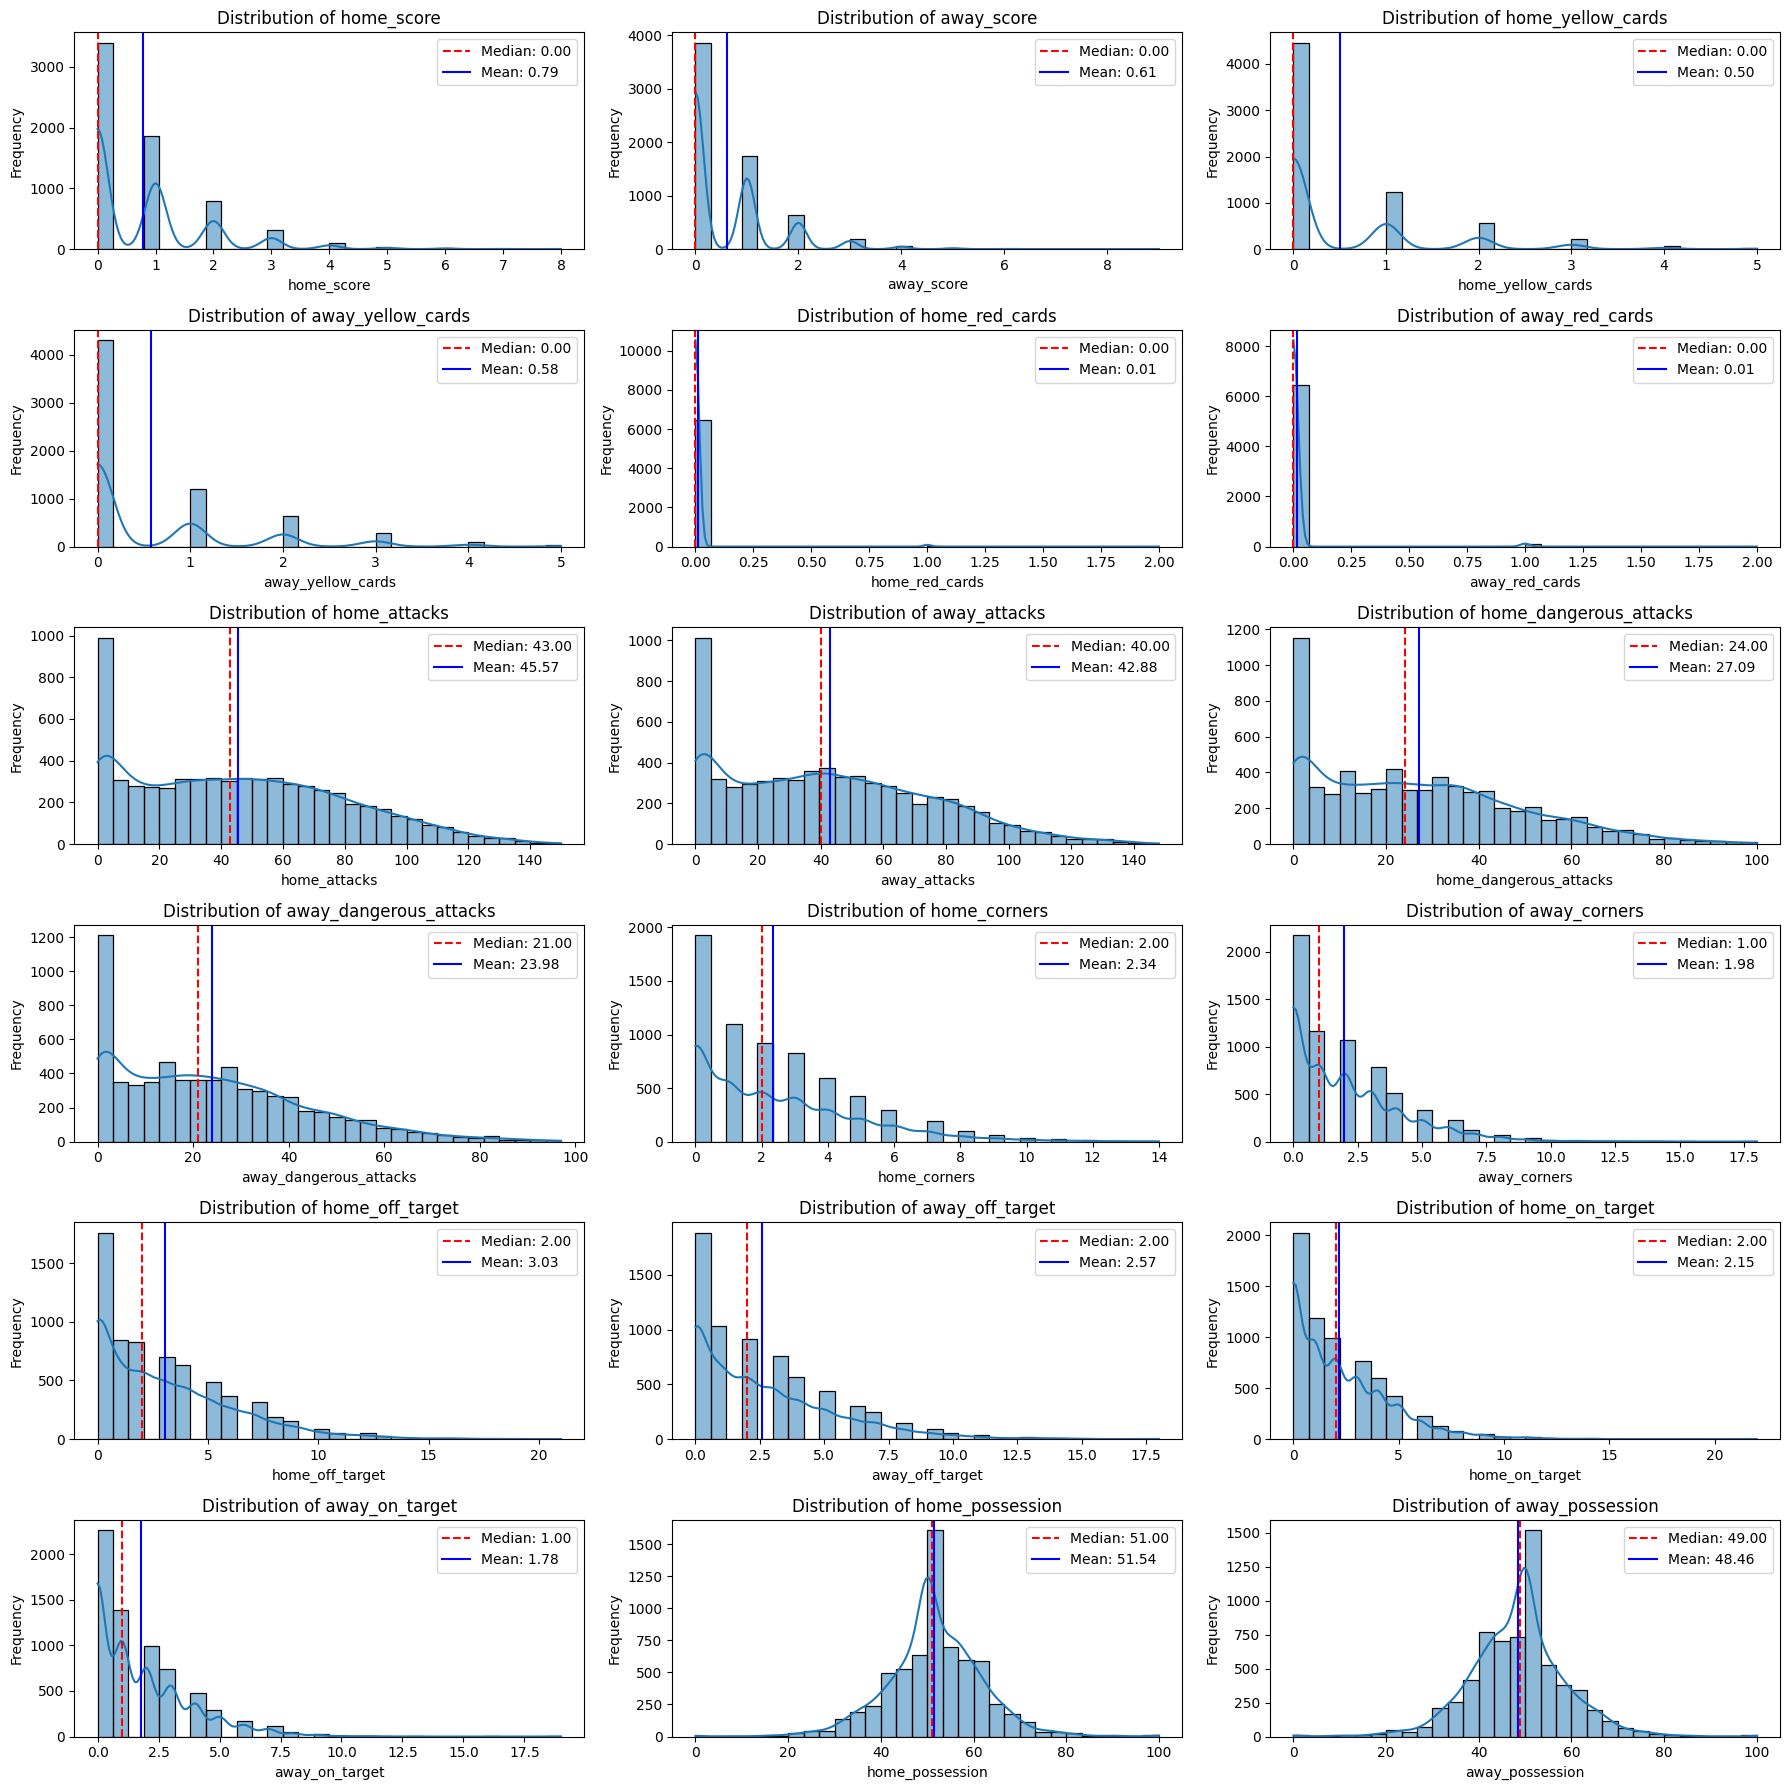

In [19]:
features = df.drop(['current_minute', 'final_delta'], axis=1)

n_cols = 3 
n_rows = len(features.columns) // n_cols + (1 if len(features.columns) % n_cols else 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 3))
axes = axes.flatten()

# Plot each feature's histogram
for i, col in enumerate(features.columns):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i], )
    
    # Calculate median and mean
    median = df[col].median()
    mean = df[col].mean()

    # Plot vertical lines for the median and mean
    axes[i].axvline(median, color='red', linestyle='--', label=f'Median: {median:.2f}')
    axes[i].axvline(mean, color='blue', linestyle='-', label=f'Mean: {mean:.2f}')
    
    
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    
    # Add legend to show median and mean
    axes[i].legend()

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Analysis for Attack-related features over Match Time

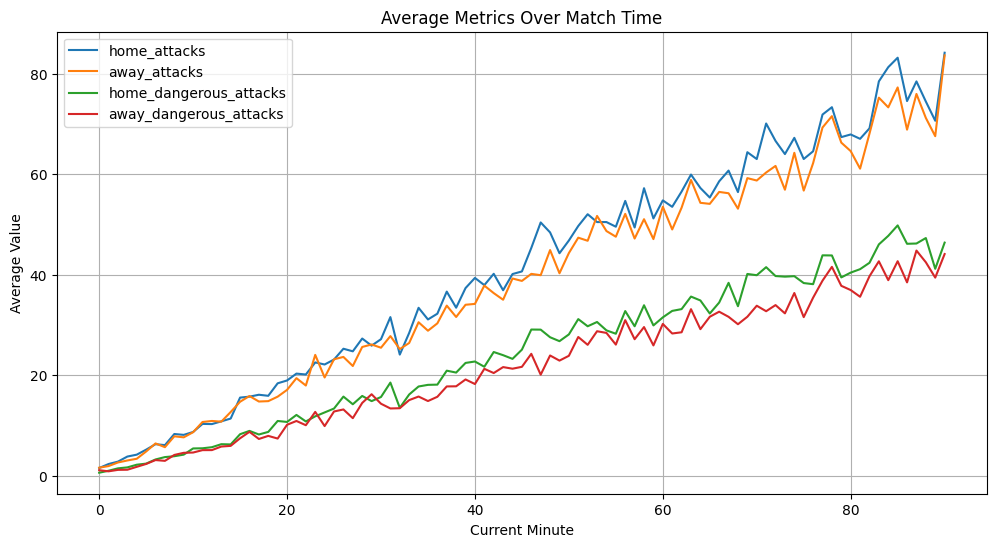

In [20]:
# Group by current_minute and calculate mean values for key metrics
time_analysis = df.groupby('current_minute').mean()
time_metrics = ['home_attacks', 'away_attacks', 'home_dangerous_attacks', 'away_dangerous_attacks']

plt.figure(figsize=(12, 6))
for metric in time_metrics:
    plt.plot(time_analysis.index, time_analysis[metric], label=metric)
plt.title("Average Metrics Over Match Time")
plt.xlabel("Current Minute")
plt.ylabel("Average Value")
plt.legend()
plt.grid()
plt.show()


In [21]:
print(df['home_attacks'].describe(), "\n")
print(df['home_dangerous_attacks'].describe())

count    6532.000000
mean       45.572413
std        34.138654
min         0.000000
25%        16.000000
50%        43.000000
75%        70.000000
max       150.000000
Name: home_attacks, dtype: float64 

count    6532.000000
mean       27.090631
std        21.733468
min         0.000000
25%         8.000000
50%        24.000000
75%        41.000000
max       100.000000
Name: home_dangerous_attacks, dtype: float64


In [22]:
new_df = df.copy()
new_df['home_attacks'] += new_df['home_dangerous_attacks'] 
new_df['away_attacks'] += new_df['away_dangerous_attacks']

new_df['home_attacks_per_minute'] = new_df.apply(lambda row: row['home_attacks'] / row['current_minute'] if row['current_minute'] != 0 else 0, axis=1)
new_df['away_attacks_per_minute'] = new_df.apply(lambda row: row['away_attacks'] / row['current_minute'] if row['current_minute'] != 0 else 0, axis=1)


---

# **Section 6: Initial model training**

In [ ]:
# X = new_df.drop(["final_delta", 'home_yellow_cards', 'away_yellow_cards', 'home_red_cards', 'away_red_cards', 'home_possession', 'away_possession', 'home_attacks', 'away_attacks', 'home_dangerous_attacks', 'away_dangerous_attacks'], axis=1)
X = df.drop(["final_delta", ], axis=1)
y = df['final_delta']

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print("\n------------------------------\n")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,random_state=42)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X: (6532, 19)
Shape of y: (6532,)

------------------------------

Shape of X_train: (4572, 19)
Shape of X_test: (1960, 19)


## **Model 1: Linear Regression using OLS (Ordinary Least Squares) Loss Function**

- For our baseline regression model, we will be using the Linear Regression with the Ordinary Least Squares (OLS) Loss Function. This method minimizes the sum of squared residuals between the observed and predicted values to find the best-fitting linear relationship. The OLS approach assumes normally distributed errors, optimizing the model's parameters to minimize prediction error, providing a clear benchmark for comparison with more complex regressors.

## **Pipeline**

|Step                         | Description                                                      |
|------------------------------|------------------------------------------------------------------|
| Normalize X                   | Scale the input features to ensure they are on a similar range. Also one of the assumptions of the Linear Regression model |
| Train Linear Regression      | Fit the Linear Regression model on the normalized training data (`X_train`, `y_train`). |
| Make Predictions     | Make predictions on the training and test set|
| Evaluate Model               | Evaluate the model on the test set (`X_test`, `y_test`) using the metrics RMSE, MSE, and R^2 |

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

# Define the pipeline with multinomial logistic regression
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, interaction_only=True,include_bias=False)),  # Transform features to second degree
    ('scaler', StandardScaler()),  # Standardize the features
    ('logreg', LogisticRegression(multi_class='multinomial', solver='lbfgs', n_jobs=3))  # Multinomial logistic regression
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# # Get the coefficients and intercepts
# coefficients = pipeline['logreg'].coef_  # Shape: (n_classes, n_features)
# intercepts = pipeline['logreg'].intercept_  # Shape: (n_classes,)
# classes = pipeline['logreg'].classes_  # Unique classes in y

# # Prepare the weights DataFrame
# weights = pd.DataFrame(coefficients, columns=X_train.columns, index=classes)
# weights['bias'] = intercepts  # Add the intercept as a bias term
# weights = weights.T  # Transpose to match desired output format

# # Display the weights DataFrame
# weights


C:\Users\Ryan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('poly',
                 PolynomialFeatures(include_bias=False, interaction_only=True)),
                ('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(multi_class='multinomial', n_jobs=3))])

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Get training score
train_preds = pipeline.predict(X_train)

train_accuracy = accuracy_score(y_train, train_preds)
train_precision = precision_score(y_train, train_preds, average='weighted')
train_recall = recall_score(y_train, train_preds, average='weighted')
train_f1 = f1_score(y_train, train_preds, average='weighted')

print("TRAINING SET")
print("Confusion Matrix:\n", confusion_matrix(y_train, train_preds))
print("Range of predicted values: ", np.unique(train_preds))
print("Range of actual values: ", np.unique(y_train))

# Get testing score
test_preds = pipeline.predict(X_test)

test_accuracy = accuracy_score(y_test, test_preds)
test_precision = precision_score(y_test, test_preds, average='weighted')
test_recall = recall_score(y_test, test_preds, average='weighted')
test_f1 = f1_score(y_test, test_preds, average='weighted')

print("\nTEST SET")
print("Confusion Matrix:\n", confusion_matrix(y_test, test_preds))
print("Range of predicted values: ", np.unique(test_preds))
print("Range of actual values: ", np.unique(y_test))

# Create a DataFrame to display the results
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Training Set': [train_accuracy, train_precision, train_recall, train_f1],
    'Testing Set': [test_accuracy, test_precision, test_recall, test_f1]
})

metrics_df


TRAINING SET
Confusion Matrix:
 [[880 410  98  22   0   0]
 [524 640 225  26   1   0]
 [213 403 261  29   5   2]
 [ 58 203 169  39   6   0]
 [ 19 106 113  18   2   0]
 [  2  31  56   9   0   2]]
Range of predicted values:  [0 1 2 3 4 5]
Range of actual values:  [0 1 2 3 4 5]

TEST SET
Confusion Matrix:
 [[345 187  40   3   1   0]
 [238 276  81   5   0   1]
 [108 207  90  10   1   0]
 [ 29  98  83   9   2   2]
 [  3  46  43   5   2   0]
 [  0   9  31   5   0   0]]
Range of predicted values:  [0 1 2 3 4 5]
Range of actual values:  [0 1 2 3 4 5]


,Metric,Training Set,Testing Set
0,Accuracy,0.398950,0.368367
1,Precision,0.374429,0.339483
2,Recall,0.398950,0.368367
3,F1-Score,0.369880,0.333495


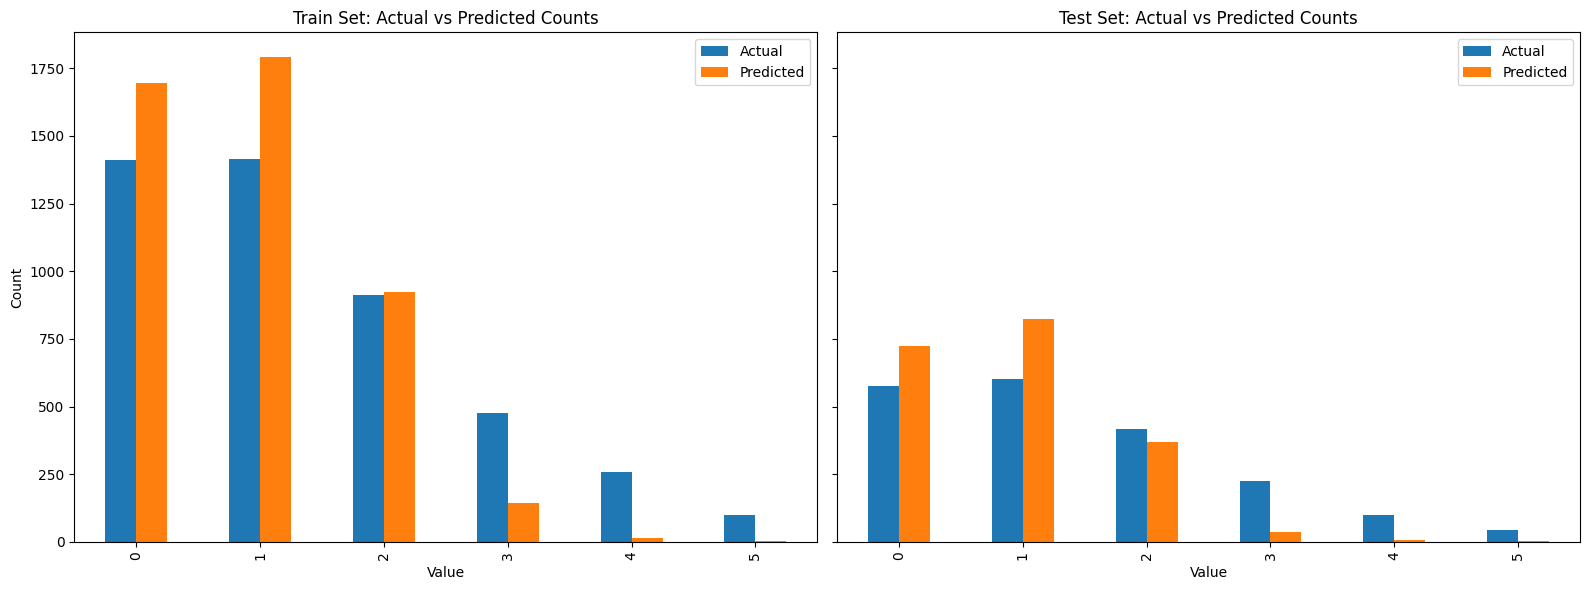

In [57]:
# Example actual and predicted counts for train and test
actual_train_counts = pd.Series(y_train).value_counts().sort_index()
predicted_train_counts = pd.Series(train_preds).value_counts().sort_index()

actual_test_counts = pd.Series(y_test).value_counts().sort_index()
predicted_test_counts = pd.Series(test_preds).value_counts().sort_index()


preds_train = pd.DataFrame({'Actual': actual_train_counts, 'Predicted': predicted_train_counts})
preds_test = pd.DataFrame({'Actual': actual_test_counts, 'Predicted': predicted_test_counts})

# Plot side-by-side bar plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Train set plot
preds_train.plot(kind='bar', ax=axes[0], color=['#1f77b4', '#ff7f0e'])
axes[0].set_title('Train Set: Actual vs Predicted Counts')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Count')

# Test set plot
preds_test.plot(kind='bar', ax=axes[1], color=['#1f77b4', '#ff7f0e'])
axes[1].set_title('Test Set: Actual vs Predicted Counts')
axes[1].set_xlabel('Value')

# Adjust layout
plt.tight_layout()
plt.show()


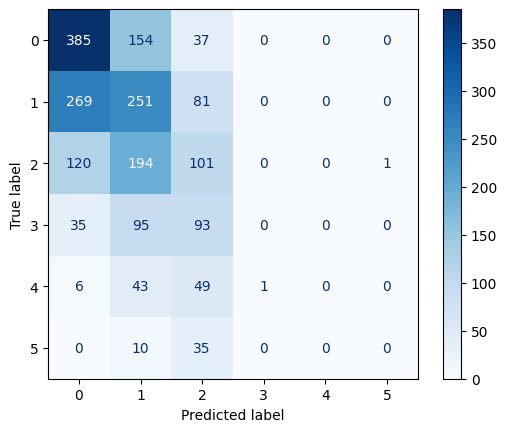

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap="Blues")

In [35]:
y_train.shape

(4572,)

In [ ]:
train_comparison = X_train.copy()
train_comparison['actual'] = y_train
train_comparison['predicted'] = train_preds.astype(int)

q = train_comparison[train_comparison['actual'] != train_comparison['predicted'].astype(int)]
q[['current_minute', 'actual', 'predicted']]

## Model 2: Neural Networks using MLPRegressor 

## Model 2: Random Forest Regressor

# **Section 7: Error analysis**

## On Random Forest

---

# **Section 8: Improving model performance**

---

# **Section 9: Model performance summary**

---

# **Section 10: Insights and conclusions**

---

# **Section 11: References**



> Dump Ref muna fix it later

https://www.frontiersin.org/journals/psychology/articles/10.3389/fpsyg.2019.00501/full

https://www.sciencedirect.com/science/article/abs/pii/S0169207018300116

https://warin.ca/ressources/books/2013_Book_AppliedPredictiveModeling.pdf

https://ieeexplore.ieee.org/document/4160265

https://www.researchgate.net/publication/265194455_pandas_a_Foundational_Python_Library_for_Data_Analysis_and_Statistics

https://web.mit.edu/dvp/Public/numpybook.pdf

https://dl.acm.org/doi/10.5555/1953048.2078195

https://www.researchgate.net/publication/350701622_seaborn_statistical_data_visualization

https://www.sciencedirect.com/book/9780123814791/data-mining-concepts-and-techniques

https://archive.org/details/exploratorydataa0000tuke_7616

---

- Anguera, M. T., Blanco-Villaseñor, A., Losada, J. L., & Perea, M. V. (2018). Sports analysis and prediction: New challenges and approaches. Frontiers in Psychology, 10, 501. https://www.frontiersin.org/journals/psychology/articles/10.3389/fpsyg.2019.00501/full

- Yin, D., & Leong, S. Y. (2017). Predictive modeling in soccer analytics. International Journal of Sports Management and Marketing, 7(3), 235-248. https://www.sciencedirect.com/science/article/abs/pii/S0169207018300116

- Kuhn, M., & Johnson, K. (2013). Applied predictive modeling. Springer Science & Business Media. https://warin.ca/ressources/books/2013_Book_AppliedPredictiveModeling.pdf

- Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. Computing in Science & Engineering, 9(3), 90-95. https://ieeexplore.ieee.org/document/4160265

- McKinney, W. (2011). pandas: A foundational Python library for data analysis and manipulation. Python for Data Analysis, O'Reilly Media. https://www.researchgate.net/publication/265194455_pandas_a_Foundational_Python_Library_for_Data_Analysis_and_Statistics

- Oliphant, T. E. (2006). A guide to NumPy. Trelgol Publishing. https://web.mit.edu/dvp/Public/numpybook.pdf

- Pedregosa, F., et al. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825-2830. https://dl.acm.org/doi/10.5555/1953048.2078195

- Waskom, M. L. (2021). Seaborn: Statistical data visualization. Journal of Open Source Software, 6(60), 3021. https://www.researchgate.net/publication/350701622_seaborn_statistical_data_visualization

- Han, J., Kamber, M., & Pei, J. (2011). Data mining: Concepts and techniques. Elsevier. https://www.sciencedirect.com/book/9780123814791/data-mining-concepts-and-techniques

- Tukey, J. W. (1977). Exploratory data analysis. Addison-Wesley. https://archive.org/details/exploratorydataa0000tuke_7616


# FORMAT THE FF BELOW 
Aggarwal, C. C. (2017). Outlier analysis. Springer International Publishing. 
Han, J., Kamber, M., & Pei, J. (2011). Data mining: Concepts and techniques. Elsevier.
Jain, A., & Zongker, D. (1997). Feature selection: Evaluation, application, and small sample performance. IEEE Transactions on Pattern Analysis and Machine Intelligence, 19(2), 153-158.
Kang, H. (2013). The prevention and handling of the missing data. Korean Journal of Anesthesiology, 64(5), 402-406.
Kuhn, M., & Johnson, K. (2013). Applied predictive modeling. Springer.
Pedregosa, F., et al. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825-2830.